In [1]:
%pylab inline
from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


In [24]:
d_ratio = 1.0/rho
print d_ratio[np.where(d_ratio<151)[0]][-1]
print np.where(d_ratio<151)[0][-1]
print xi[1690]

150.853400418
1690
16.900001


In [25]:
sim_rho = rp["density"].in_units("g/cm**3").value
print min(sim_rho[np.where(sim_rho>1e-26)[0]])
print 1.10e-19*rho[1690]

5.77655529758e-21
7.2918475616e-22


In [29]:
idx=np.where(1.1e-19/sim_rho>150)[0]

In [161]:
rho_out=8e-27
1.1e-19/sim_rho[np.where(sim_rho>rho_out)[0][-1]]

19.042493354024028

In [2]:
cd ~/project/FLASH4.3_2/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


In [4]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.set_zlim(physical_quantity, 5.5e-26,1.1e-19)
    slc.show()
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
#     slc.set_log("all", False)
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_zlim(physical_quantity,58,60)
#     slc.set_log("all", False)
    slc.show()


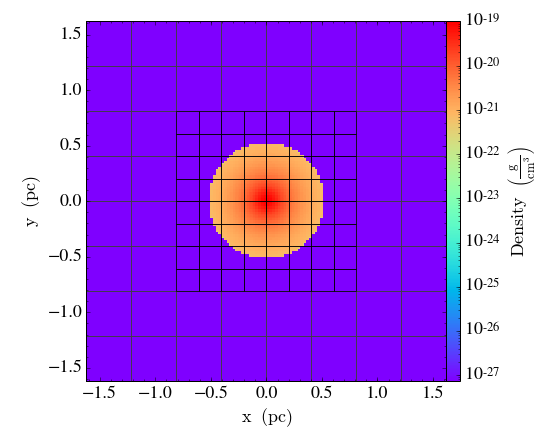


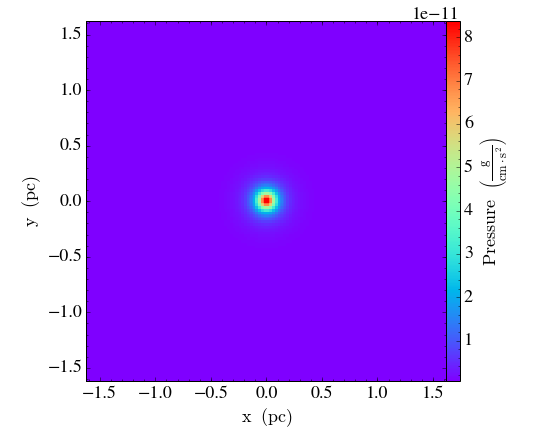


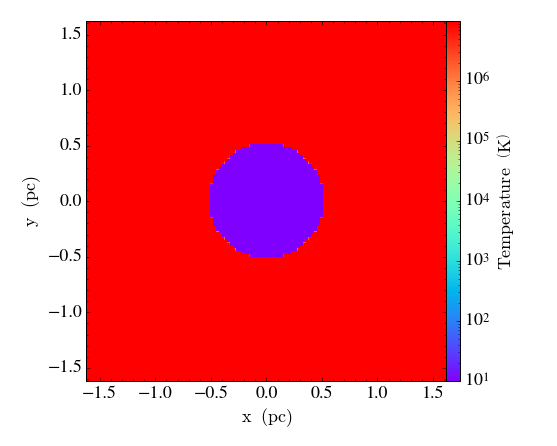

In [5]:
plot_all(0)

(0, 1)

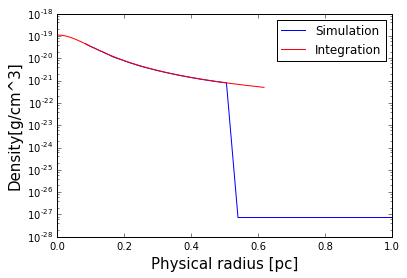

In [13]:
i =0
rho_c = 1.1E-19
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
plt.figure()
sp = pf.sphere(pf.domain_center, (1.5,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.semilogy(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 20.0
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.semilogy(r*3.24077929e-19,rho*rho_c,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(0,1)


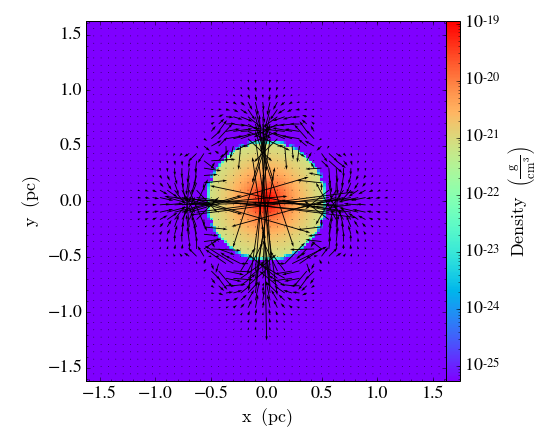

In [15]:
plot_dens(1)